# 0.0. Imports

In [1]:
import os
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

sys.path.insert(0, "../src/")
sys.path.append(os.path.join(os.path.abspath(""), "../src/data_process"))

from data_process.process_data import processing_data
from data_process.reframe_data import DataReframing

## 0.1. Utils functions

In [2]:
def plot_dual_axis(dataframe, primary_column, *secondary_columns, image_name='plot.png'):
    fig, axes = plt.subplots(len(secondary_columns), 1, figsize=(12, 3))

    for i, secondary_column in enumerate(secondary_columns):
        ax1 = axes[i]
        ax1.plot(dataframe.reset_index()['Date'], dataframe[primary_column], color="red")
        ax1.set_ylabel(primary_column, color="red")
        ax1.tick_params(axis='y', labelcolor="red")

        ax2 = ax1.twinx()
        ax2.plot(dataframe.reset_index()['Date'], dataframe[secondary_column], color="green")
        ax2.set_ylabel(secondary_column, color="green")
        ax2.tick_params(axis='y', labelcolor="green")

    plt.tight_layout()
    plt.savefig('../reports/images/' + image_name, format='png', dpi=1200)  # Adicionando linha para salvar o gráfico
    plt.show()

# 1.0. Data loading and processing

In [3]:
df = processing_data()

# 2.0. Exploratory data analysis

## 2.1. Analyzing dataframe

In [5]:
pd.concat([df.head(1), df.tail(1)])

,JPM,BAC,WFC,DEXUSUK,DEXUSEU,SP500,DJIA,VIXCLS
Date,,,,,,,,
2013-10-24,39.696739,11.797855,32.038059,1.6186,1.3810,1752.07,15509.21,13.20
2023-10-20,142.949997,26.309999,40.270000,1.2153,1.0592,4224.16,33127.28,21.71


A tabela apresentada compreende os resultados derivados de uma coleta de dados minuciosa, reunindo informações cruciais referentes aos valores das ações de diversos bancos, indicadores de mercado selecionados e, por fim, as cotações cambiais entre o dólar e as moedas britânica e europeia.

A série de dados abrange um período abrangente, estendendo-se do ano de 2013 até o ano de 2023. Contudo, é imperativo salientar que o conjunto de informações pode ter sofrido algumas exclusões ao longo do processamento, motivadas pela detecção de valores ausentes. Nesse sentido, foi conduzida uma etapa de depuração dos dados, visando à eliminação de quaisquer registros que pudessem conter lacunas informacionais.

In [5]:
df.describe()

,JPM,BAC,WFC,DEXUSUK,DEXUSEU,SP500,DJIA,VIXCLS
count,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000
mean,90.421824,23.991856,41.279237,1.364567,1.148859,2953.895921,24963.858717,18.109690
std,35.487203,9.030004,6.612033,0.138809,0.086326,890.949169,6552.728084,7.334491
min,38.985710,9.479692,19.843937,1.070300,0.961600,1741.890000,15372.800000,9.140000
25%,52.967749,14.347563,39.080567,1.265500,1.093725,2105.042500,18031.350000,13.200000
50%,90.715576,24.581212,42.475018,1.318250,1.128500,2761.880000,25017.800000,16.080000
75%,119.884657,29.753060,45.336330,1.429825,1.182400,3831.255000,31283.717500,21.287500
max,161.703842,47.172756,56.706089,1.716500,1.392700,4796.560000,36799.650000,82.690000


A tabela anterior é feito o resumo numérico de cada variável dos dados, alguns pontos importantes para se destacar da tabela:
- A média do do preço da ação de JPM (JPMorgan Chase) é de aproximadamente 90.42, com um desvio padrão de 35.48.
- A média do do preço da ação de BAC (Bank of America) é cerca de 23.99, com um desvio padrão de 9.03.
- A média do do preço da ação de WFC (Wells Fargo) é de cerca de 41.27, com um desvio padrão de 6.61.
- Há diferenças notáveis nas médias dos diferentes bancos (JPM, BAC, WFC), sugerindo que eles podem ter diferentes níveis de desempenho ou tamanho no mercado financeiro.
- O DJIA (Dow Jones Industrial Average) tem um valor mínimo de 15372.8 e máximo de 36799.65, indicando a faixa de flutuação do índice ao longo do período.
- O VIXCLS (Índice de Volatilidade CBOE) tem um valor mínimo de 9.14 e máximo de 82.69, mostrando a gama de volatilidade percebida nos mercados financeiros.

## 2.2. Univariate analysis

### 2.2.1. Stocks

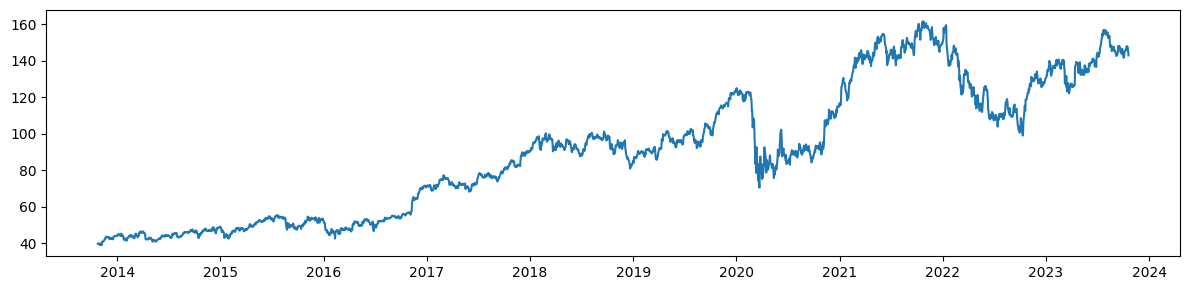

In [6]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.plot(df[['JPM']])
plt.tight_layout()
fig.savefig('../reports/images/jpm_stocks.png', format='png', dpi=1200)

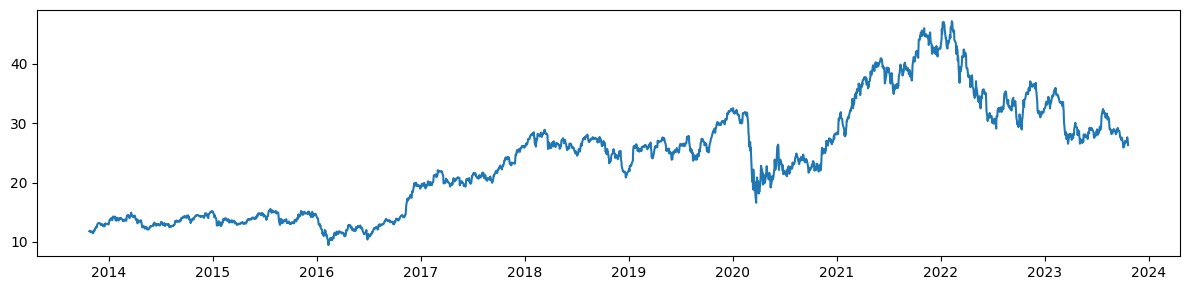

In [7]:
plt.figure(figsize=(12, 3))
plt.plot(df[['BAC']])
plt.tight_layout()

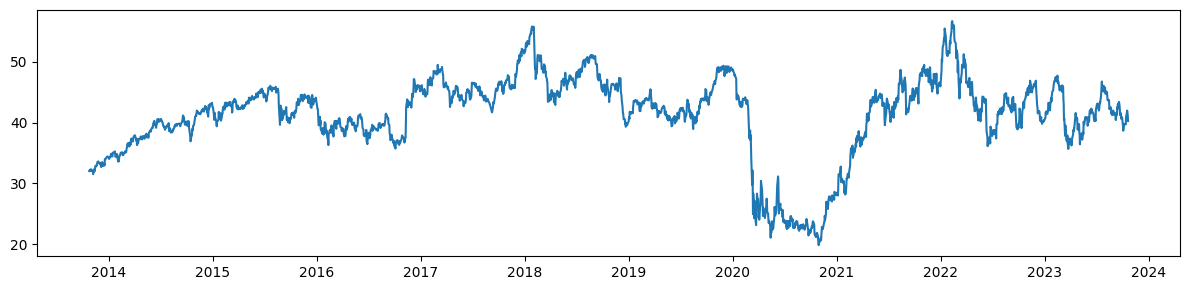

In [8]:
plt.figure(figsize=(12, 3))
plt.plot(df[['WFC']])
plt.tight_layout()


Na análise dos preços das três ações, é perceptível uma queda significativa em meados de 2020, possivelmente atribuída ao impacto da pandemia que teve início nesse período. Observa-se, no entanto, uma subsequente recuperação, com todas as ações retornando aos níveis pré-pandemia. É notável que a ação do WFC apresentou uma queda mais acentuada em comparação às outras duas, demandando um período ligeiramente mais prolongado para restabelecer os padrões prévios.

### 2.2.2. Currencies

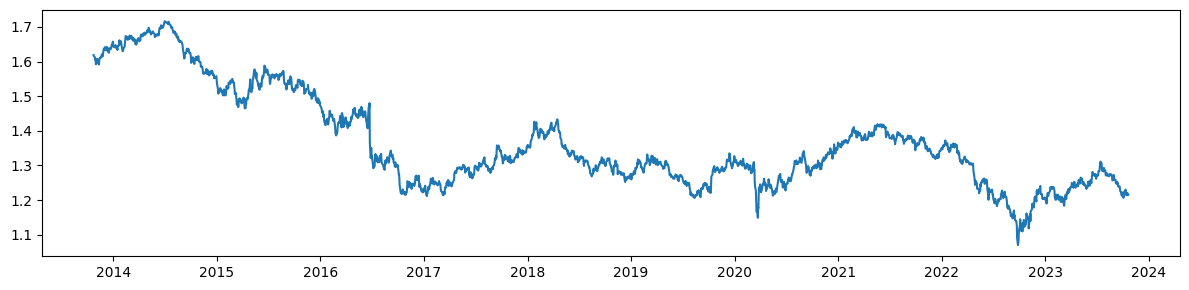

In [9]:
plt.figure(figsize=(12, 3))
plt.plot(df[['DEXUSUK']])
plt.tight_layout()

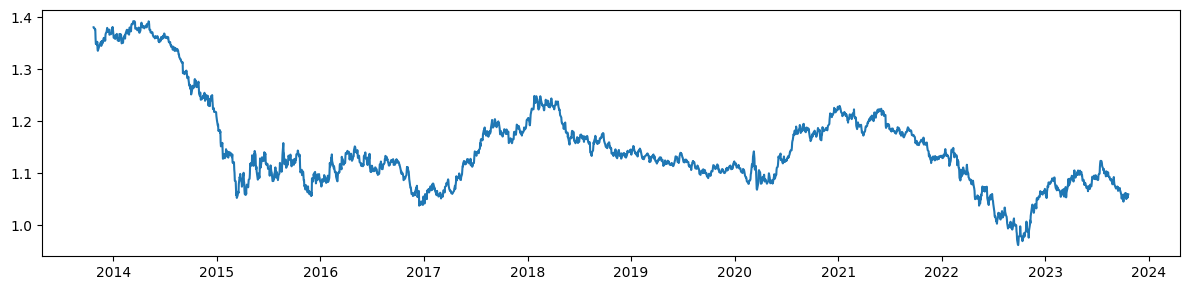

In [10]:
plt.figure(figsize=(12, 3))
plt.plot(df[['DEXUSEU']])
plt.tight_layout()

Entre 2013 e 2022, o comportamento do DEXUSEU (taxa de câmbio entre o dólar americano e o euro) revela uma trajetória inicialmente estável até meados de 2014, em torno de 1.33 EUR/USD. Contudo, entre meados de 2014 e 2016, ocorreu uma notável depreciação do euro em relação ao dólar, elevando a taxa para cerca de 1.10 EUR/USD, possivelmente devido a preocupações econômicas na zona do euro e políticas monetárias divergentes. A partir de 2017, houve um fortalecimento gradual do euro, refletindo melhorias econômicas e ações do BCE para estimular o crescimento, marcando uma reversão da tendência anterior.

O  comportamento do DEXUSUK (taxa de câmbio entre o dólar americano e a libra esterlina) a partir de meados de 2020, observou-se uma queda acentuada na taxa de câmbio DEXUSUK, indicando um enfraquecimento da libra em relação ao dólar. Essa queda pode ter sido impulsionada por eventos econômicos globais, como a pandemia de COVID-19 e as consequentes medidas de estímulo adotadas, que impactaram as expectativas dos investidores e as dinâmicas do mercado.

###  2.2.3. Indicies

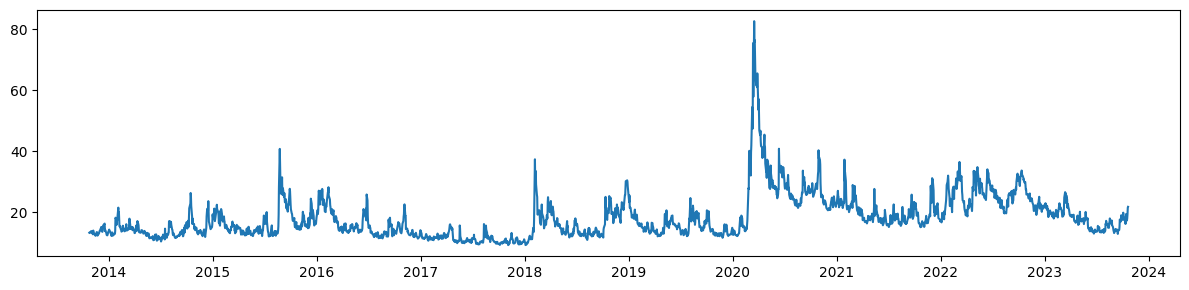

In [11]:
plt.figure(figsize=(12, 3))
plt.plot(df[['VIXCLS']])
plt.tight_layout()

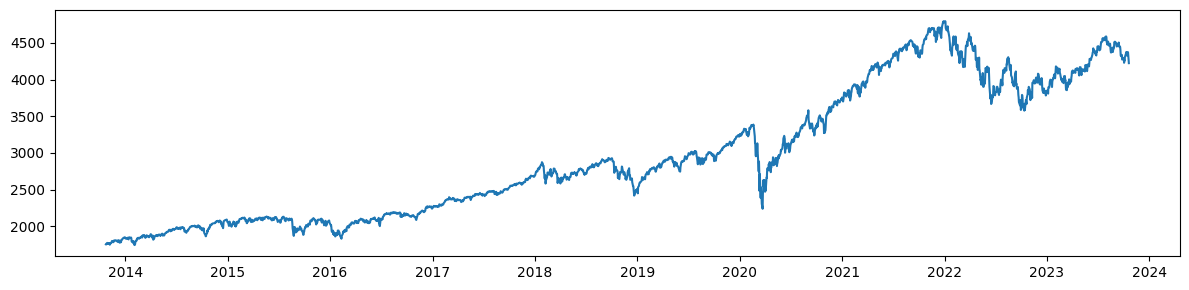

In [12]:
plt.figure(figsize=(12, 3))
plt.plot(df[['SP500']])
plt.tight_layout()

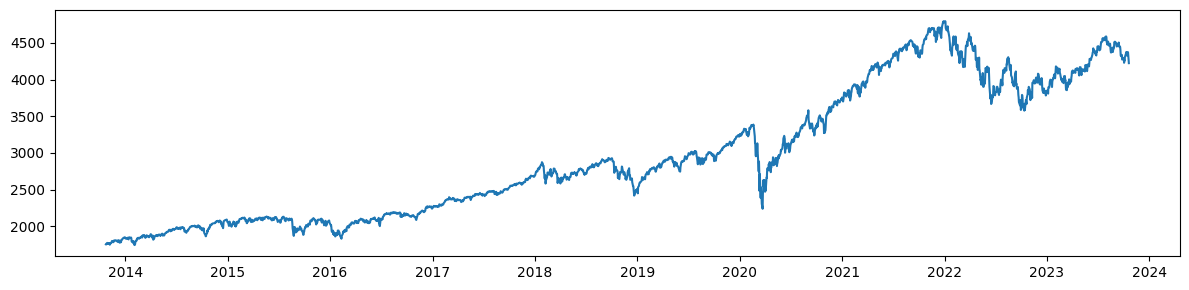

In [13]:
plt.figure(figsize=(12, 3))
plt.plot(df[['SP500']])
plt.tight_layout()

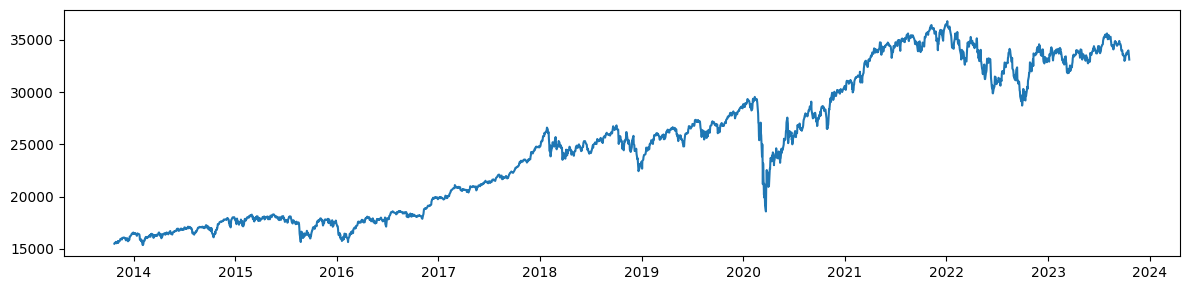

In [14]:
plt.figure(figsize=(12, 3))
plt.plot(df[['DJIA']])
plt.tight_layout()

Certamente, a pandemia de 2020 teve um impacto significativo nos índices financeiros. É notável que, em resposta a essa perturbação excepcional, houve uma tendência geral de recuperação para os padrões anteriores, conforme indicado pelos preços das ações e pela análise desses índices.

Ao incorporar esses insights em um modelo de machine learning, é possível melhorar a capacidade de prever e entender as respostas dos mercados a futuros eventos disruptivos. Com a compreensão desses padrões de recuperação e comportamentos de mercado, o modelo terá uma base sólida para análises preditivas mais precisas e informadas, contribuindo para uma tomada de decisão mais eficaz no contexto financeiro.

## 2.3. Multivariate analysis

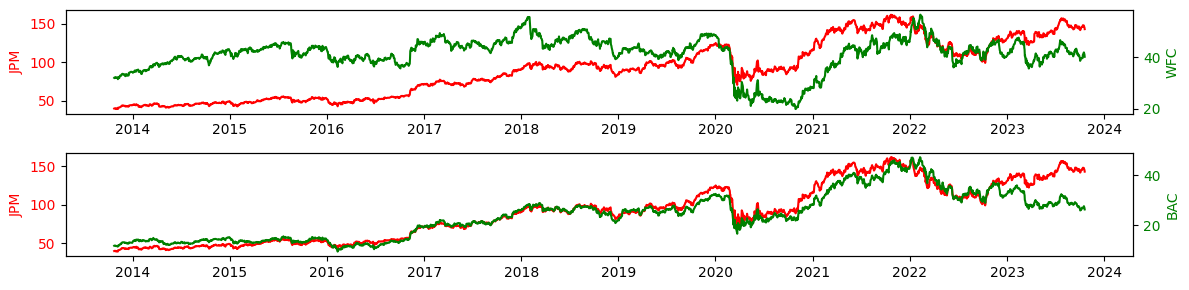

In [7]:
plot_dual_axis(df, 'JPM', 'WFC', 'BAC', image_name='jpm_wfc_bac.png')


É notável e relevante observar que nos gráficos anteriores, há uma clara comparação entre o preço da ação que será objeto de previsão (no caso, JPM) com os preços das ações de seus concorrentes (BAC e WFC). Uma análise mais detalhada revela padrões notáveis de comportamento entre JPM e BAC, indicando uma certa similaridade em suas trajetórias de preço ao longo do tempo. Isso pode sugerir uma correlação ou influências compartilhadas entre esses dois ativos, possivelmente devido a fatores do setor financeiro ou condições econômicas mais amplas.

Além disso, a diferença entre JPM e WFC, apesar de notável em termos de valores absolutos, destaca uma tendência semelhante em termos de padrões de aumento ou queda. Essa semelhança na direção das flutuações pode indicar uma sensibilidade compartilhada a eventos macroeconômicos ou fatores do mercado que afetam ambos os ativos de maneira semelhante.

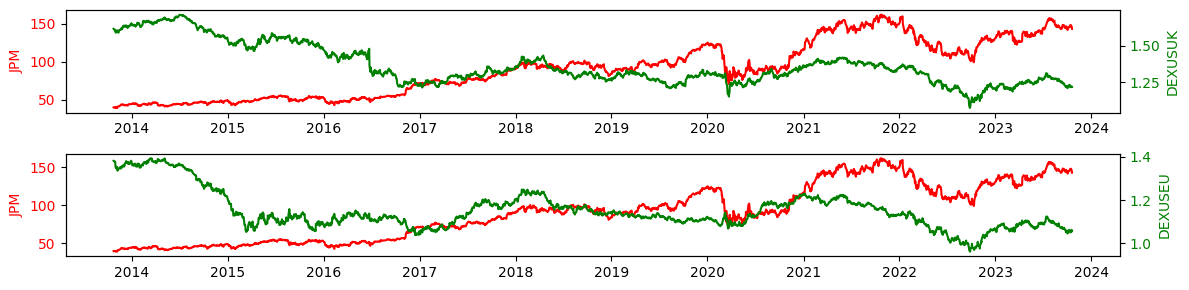

In [8]:
plot_dual_axis(df, 'JPM', 'DEXUSUK', 'DEXUSEU', image_name='jpm_currencies.png')

É possível notar que as cotações entre dólares, libras e euros podem apresentar desafios na extração imediata de informações impactantes, devido à complexidade de fatores que influenciam as taxas de câmbio. Dado o caráter multifacetado das dinâmicas cambiais, a abordagem de análise pode se estender para além de observações visuais diretas.

Explorar métodos adicionais, como análise de correlação, testes de hipóteses e algoritmos de machine learning, pode ser uma abordagem promissora para desvendar padrões e relações subjacentes nos dados cambiais. A análise de correlação pode revelar graus de associação entre as diferentes taxas de câmbio, ajudando a identificar se há momentos em que elas se movem de forma coordenada ou divergente.

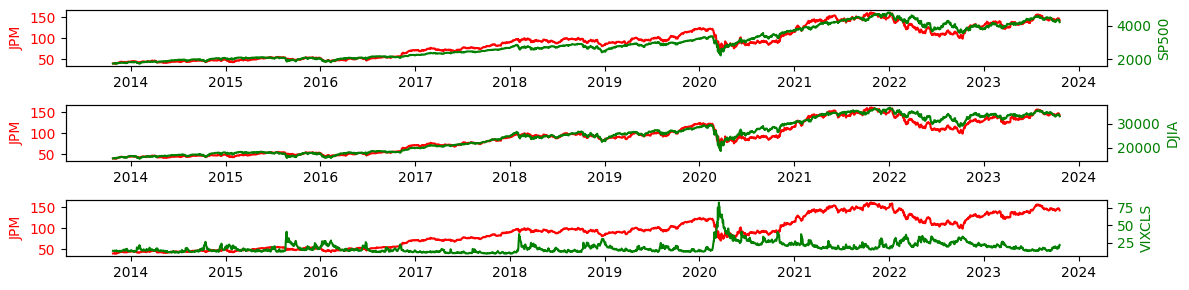

In [9]:
plot_dual_axis(df, 'JPM', 'SP500', 'DJIA', 'VIXCLS', image_name='jpm_indicies.png')


O insight aqui é que existe uma possibilidade de que os indíces SP500, DJIA e VIXCLS sejam capaz de auxiliar na predição, dado que os comportamentos estão alinhados, portanto o uso dessas variável podem vir ser essencial para o projeto.

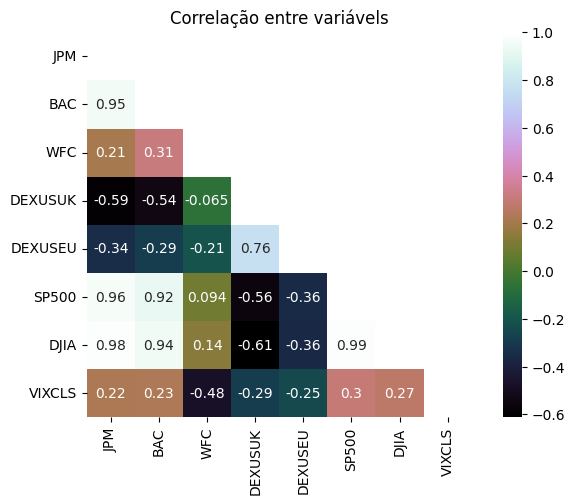

In [10]:
corr = df.corr()
matrix = np.triu(corr)

fig, ax = plt.subplots(figsize=(8,5))
plt.title('Correlação entre variávels')
sns.heatmap(corr, vmax=1, square=True, annot=True, cmap='cubehelix', mask=matrix)
fig.savefig('../reports/images/correlacao.png', format='png', dpi=1200)

Olhando o gráfico de correlação, podemos identificar uma alta correlação positiva entre a variável alvo (JPM) com os indíces, e também uma correlação negativa com as taxas de câmbios. 

## 2.4. Time series analysis

In [11]:
from statsmodels.tsa.stattools import adfuller

# Run test
adf_result = adfuller(df[['JPM']])
print(f'Teste estatístico ADF {adf_result[0]:.2f}')
print(f'P Value {adf_result[1]:.2f}')
if adf_result[1] > 0.05:
    print('A serie temporal nao e estacionaria. Existe uma estrutura dependente do tempo, como a sazonalidade.')
else:
    print('Serie temporal e estacionaria, p value < 0.05.')

Teste estatístico ADF -1.01
P Value 0.75
A serie temporal nao e estacionaria. Existe uma estrutura dependente do tempo, como a sazonalidade.


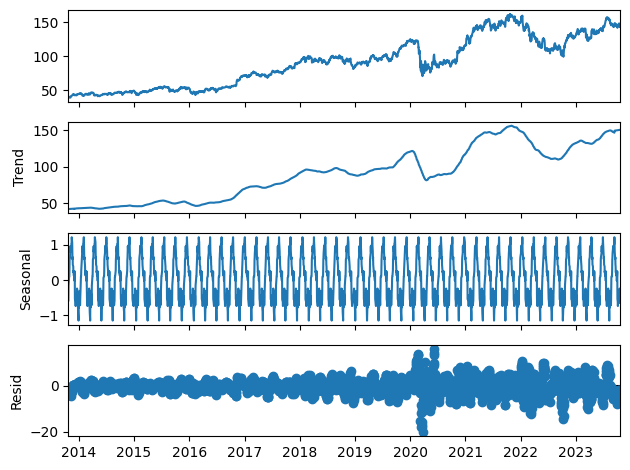

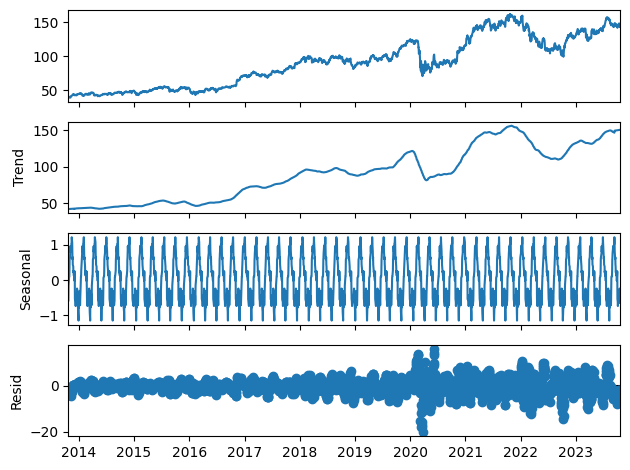

In [12]:
seasonal_decomp = seasonal_decompose(df[['JPM']], model="additive", extrapolate_trend='freq', period=52)
seasonal_decomp.plot()

É importante observar que a série temporal de preços das ações da JPM (JPMorgan Chase & Co.) não é estacionária e apresenta uma estrutura dependente do tempo, como a sazonalidade. Isso significa que os dados exibem padrões que se repetem em intervalos regulares de tempo, o que pode ter implicações significativas para a análise e previsão.

A sazonalidade pode ser causada por diversos fatores, como eventos sazonais no setor financeiro, comportamentos econômicos previsíveis em determinados períodos do ano ou influências externas que afetam o mercado de forma recorrente. Esses padrões sazonais podem ter um impacto direto nos preços das ações e precisam ser adequadamente considerados ao construir um modelo de previsão.

Assim se faz necessário aplicar processador de dados para adequar os dados e além disso a criação de novas features, no processo de feature engineering, para auxiliar o modelo a entender os padrões e com isso ele consiga realizar predições mais reais.

### 2.4.1. Processando time series

In [4]:
dr = DataReframing(df)
dataset, X, Y = dr.reframing_data()

In [5]:
dataset.head()

,JPM_pred,BAC,WFC,DEXUSUK,DEXUSEU,SP500,DJIA,VIXCLS,JPM_DT,JPM_3DT,JPM_6DT,JPM_12DT
Date,,,,,,,,,,,,
2014-01-23,-0.008358,-0.017054,-0.001078,0.014370,0.005571,-0.010835,-0.017418,0.114520,-0.052099,-0.028456,0.005811,0.079796
2014-01-30,0.008535,0.004144,-0.006494,-0.007553,-0.009622,-0.018920,-0.021766,0.227636,-0.008358,-0.049980,-0.000953,0.089513
2014-02-06,0.027074,-0.014278,-0.021242,-0.008650,0.004051,-0.011638,-0.013984,-0.003476,0.008535,-0.051922,-0.024167,0.095915
2014-02-13,-0.007264,0.003588,0.026445,0.018068,0.004767,0.031308,0.025214,-0.197644,0.027074,0.027251,-0.001206,0.062512
2014-02-21,-0.013808,-0.027847,-0.008298,-0.000781,0.003870,0.003502,0.004713,0.037478,-0.007264,0.028344,-0.021636,0.009126


In [7]:
Y.head()

Date
2014-01-23   -0.008358
2014-01-30    0.008535
2014-02-06    0.027074
2014-02-13   -0.007264
2014-02-21   -0.013808
Name: JPM_pred, dtype: float64

In [14]:
adf_result = adfuller(Y)
print(f'Teste estatístico ADF {adf_result[0]:.2f}')
print(f'P Value {adf_result[1]:.2f}')
if adf_result[1] > 0.05:
    print('A serie temporal nao e estacionaria. Existe uma estrutura dependente do tempo, como a sazonalidade.')
else:
    print('Serie temporal e estacionaria, p value < 0.05.')

Teste estatístico ADF -13.79
P Value 0.00
Serie temporal e estacionaria, p value < 0.05.


Com a transformação realizada, agora o a time series da variável alvo se encontra estacionária. Podemos confirmar com o teste de hipótese realizada a acima. Além disso o gráfico abaixo também é mostrado a estacionaridade da variável alvo.

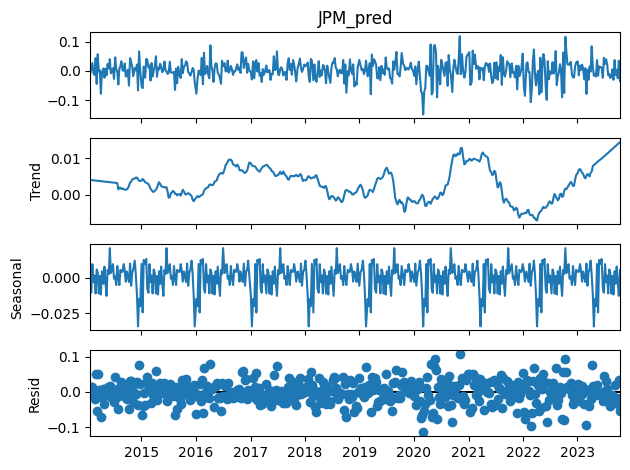

In [16]:
seasonal_decomp = seasonal_decompose(Y, model="additive", extrapolate_trend='freq', period=52)
seasonal_decomp.plot();